In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
!pip install optuna
!pip install catboost

In [53]:
!pip install optuna.integration

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import optuna
warnings.filterwarnings('ignore')

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, average_precision_score, log_loss

In [56]:
bank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assignment/bank-additional-full.csv',delimiter=';')
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [57]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [58]:
bank = bank.drop('duration',axis = 1)
#data leakage

#Loss function Define

In [59]:
tau = 1/(1+2)
print(f'Decision threshold: tau={round(tau,3)}')

Decision threshold: tau=0.333


#EDA

In [60]:
bank['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [61]:
bank['y'].replace({'yes': 1, 'no': 0}, inplace=True)

In [62]:
bank['pdays'].value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [63]:
def pdays_transform(days):
   if days != 999:
     return 1
   else:
     return 0
bank['pdays'] = bank['pdays'].apply(pdays_transform)

In [64]:
pd.crosstab(bank['pdays'],bank['y'])

y,0,1
pdays,,
0,36000,3673
1,548,967


In [65]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [66]:
categorical = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
numerical = ['age','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
binary = ['pdays']

In [67]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/assignment')

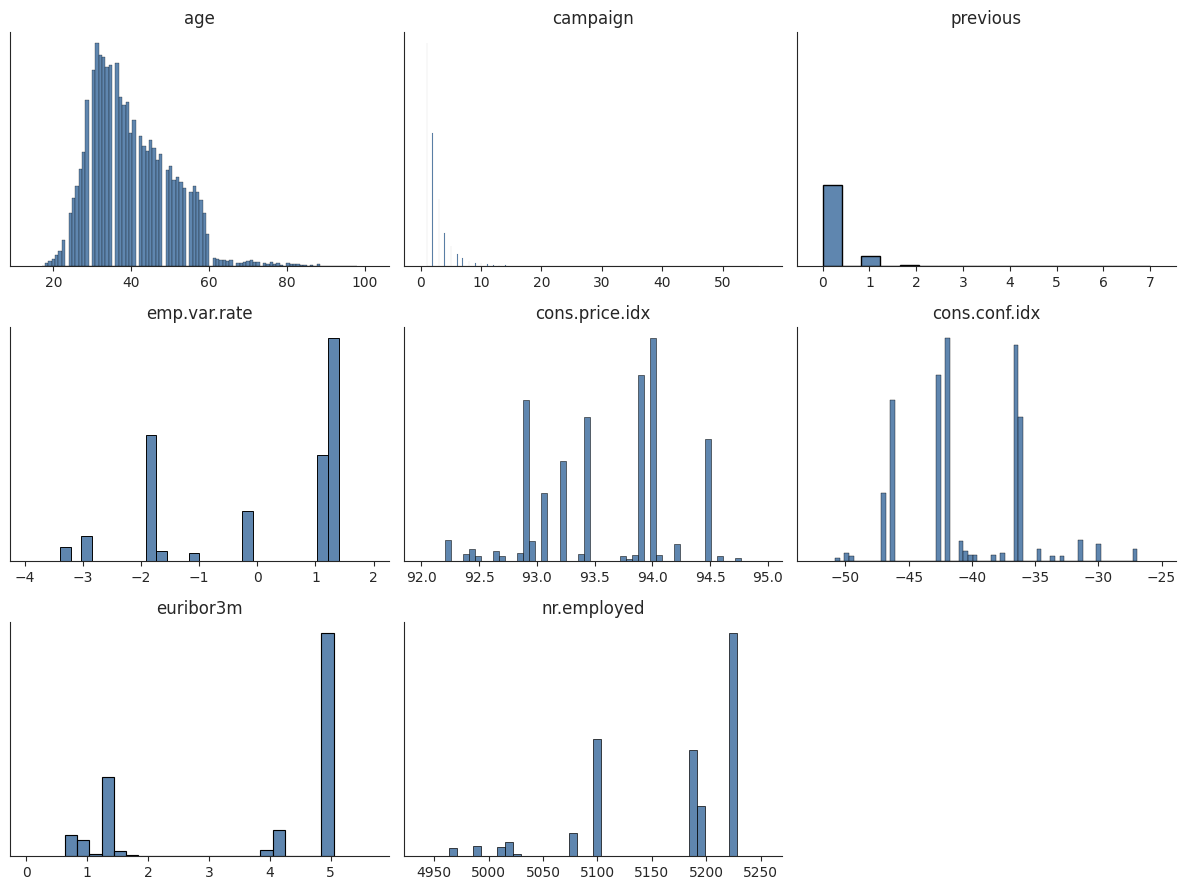

In [68]:
from tutorial4 import distplots

distplots(bank[numerical])
plt.show()

In [69]:
bank['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [70]:
bank['campaign'].value_counts()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

In [71]:
discrete = ['previous']
continuous = ['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

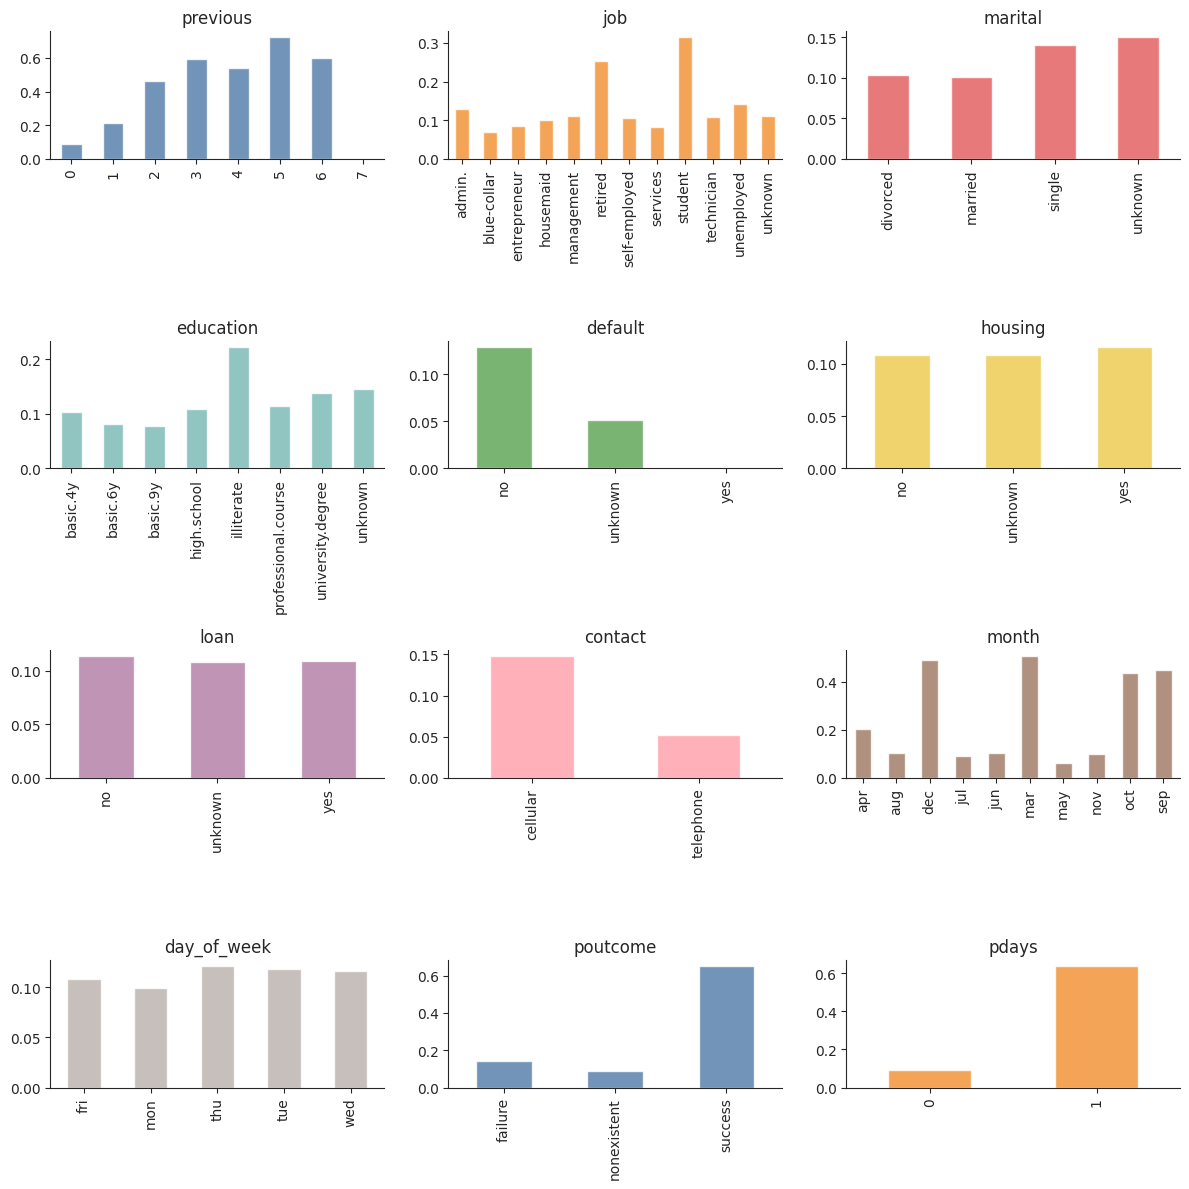

In [72]:
from tutorial4 import crosstabplots

crosstabplots(bank[discrete+categorical+binary], bank['y'])
plt.show()

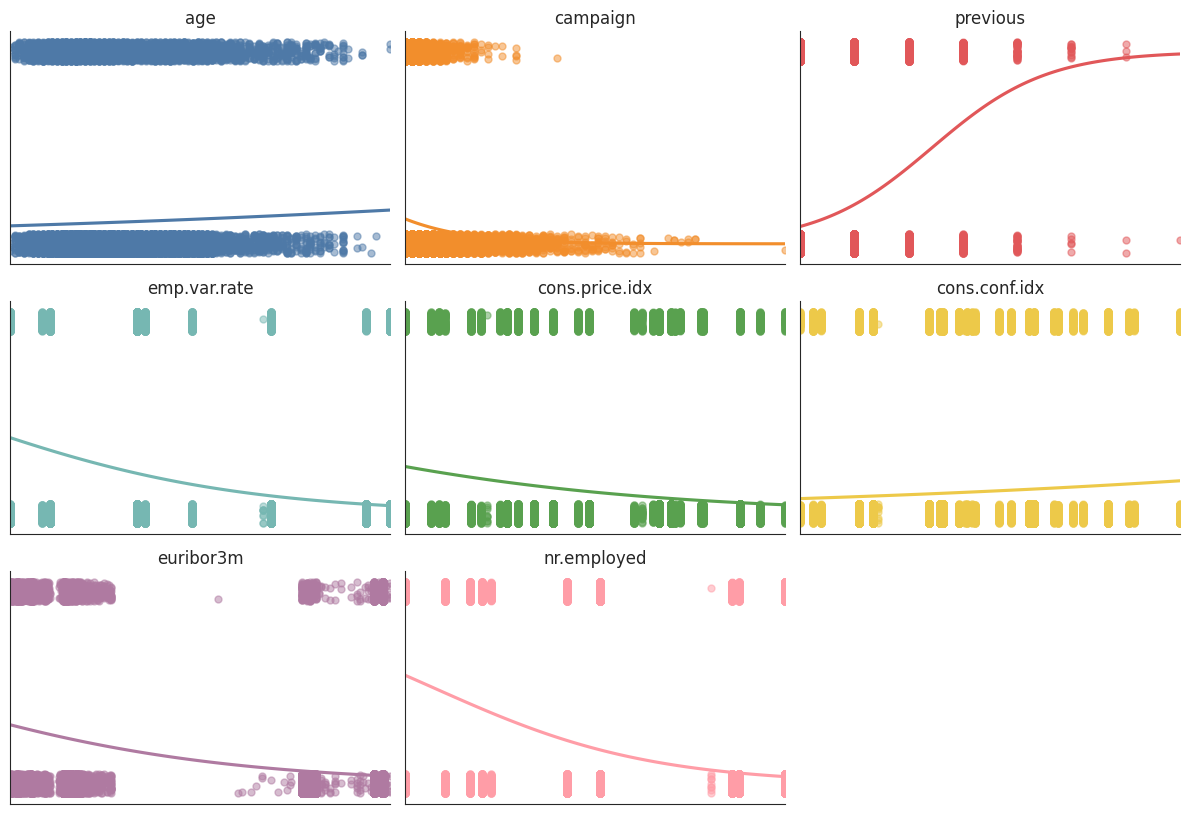

In [73]:
from tutorial4 import regplots

fig, ax = regplots(bank[numerical], bank['y'])
plt.show()
#insights

In [74]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(bank[continuous],bank['y'],random_state=1)
results1 = pd.DataFrame(mi, index=continuous, columns=['MI'])
results1.sort_values('MI', ascending = False)

,MI
euribor3m,0.073361
cons.price.idx,0.070183
cons.conf.idx,0.068446
nr.employed,0.063353
emp.var.rate,0.055522
age,0.011853
campaign,0.006021


In [75]:
from sklearn.preprocessing import OrdinalEncoder
features = OrdinalEncoder().fit_transform(bank[discrete + categorical + binary])

mi = mutual_info_classif(features, bank['y'], n_neighbors=5,
                         random_state=1, discrete_features=True)

results2 = pd.DataFrame(mi, index = discrete+categorical+binary, columns=['MI'])
results2.sort_values('MI', ascending = False)

,MI
pdays,0.030834
poutcome,0.030384
month,0.026407
previous,0.019269
contact,0.011646
job,0.009859
default,0.005774
education,0.002390
marital,0.001434
day_of_week,0.000322


In [76]:
results = pd.concat([results1, results2], axis=0).sort_values(by='MI', ascending=False).round(4)
results.round(4)

,MI
euribor3m,0.0734
cons.price.idx,0.0702
cons.conf.idx,0.0684
nr.employed,0.0634
emp.var.rate,0.0555
pdays,0.0308
poutcome,0.0304
month,0.0264
previous,0.0193
age,0.0119


#Feature Engineering

In [77]:
dummies = pd.get_dummies(bank[categorical + binary + discrete],drop_first = True)
print(dummies.head().astype(int))

   pdays  previous  job_blue-collar  job_entrepreneur  job_housemaid  \
0      0         0                0                 0              1   
1      0         0                0                 0              0   
2      0         0                0                 0              0   
3      0         0                0                 0              0   
4      0         0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             1            0   
2               0            0                  0             1            0   
3               0            0                  0             0            0   
4               0            0                  0             1            0   

   ...  month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0  ...         

In [78]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
# Yeo-Johnson transformation
transform = ['age','campaign','emp.var.rate','cons.conf.idx']
yj_transf = PowerTransformer(method='yeo-johnson').fit(bank.loc[:,transform])
bank[transform] = yj_transf.transform(bank[transform])

In [79]:
# Standardisation
standfeatures = continuous
scaler = StandardScaler().fit(bank.loc[:, standfeatures])
bank.loc[:,standfeatures] = scaler.transform(bank.loc[:, standfeatures])

In [80]:
all_data = pd.concat((bank[continuous],dummies,bank['y']),axis=1)
all_data.shape

(41188, 53)

In [81]:
correlation_matrix = all_data.corr()

print(correlation_matrix)

                                    age  campaign  emp.var.rate  \
age                            1.000000  0.003426      0.043899   
campaign                       0.003426  1.000000      0.154220   
emp.var.rate                   0.043899  0.154220      1.000000   
cons.price.idx                 0.020340  0.115551      0.758294   
cons.conf.idx                  0.118307 -0.009228      0.310969   
euribor3m                      0.054599  0.126815      0.954461   
nr.employed                    0.032368  0.137231      0.894123   
pdays                          0.006852 -0.055382     -0.255437   
previous                      -0.002890 -0.079546     -0.424486   
job_blue-collar               -0.006896  0.002296      0.048943   
job_entrepreneur               0.039467  0.001494     -0.000594   
job_housemaid                  0.084565  0.000974      0.040669   
job_management                 0.071819 -0.009196     -0.027271   
job_retired                    0.362404 -0.013510     -0.08610

In [82]:
all_data = all_data.drop('pdays',axis = 1)

In [83]:
all_data.shape

(41188, 52)

In [84]:
index_tv, index_test = train_test_split(all_data.index, train_size=0.8, random_state=10, shuffle=True)
tv = all_data.loc[index_tv, :].copy()
test = all_data.loc[index_test, :].copy()

index_train, index_valid = train_test_split(tv.index, train_size=0.8, random_state=10, shuffle=True)
train = all_data.loc[index_train, :].copy()
valid = all_data.loc[index_valid, :].copy()

In [85]:
predictors = all_data.columns.to_list()

In [86]:
predictors.remove('y')

In [87]:
X_train = train.loc[:,predictors].to_numpy()
X_valid = valid.loc[:,predictors].to_numpy()
X_test = test.loc[:,predictors].to_numpy()

y_train = train.loc[:,'y'].to_numpy()
y_valid = valid.loc[:,'y'].to_numpy()
y_test = test.loc[:,'y'].to_numpy()

#Linear Model

*   Logistic
*   LDA
*   QDA
*   KNN



In [88]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty = None)
logit.fit(X_train, y_train)

LogisticRegression(penalty=None)

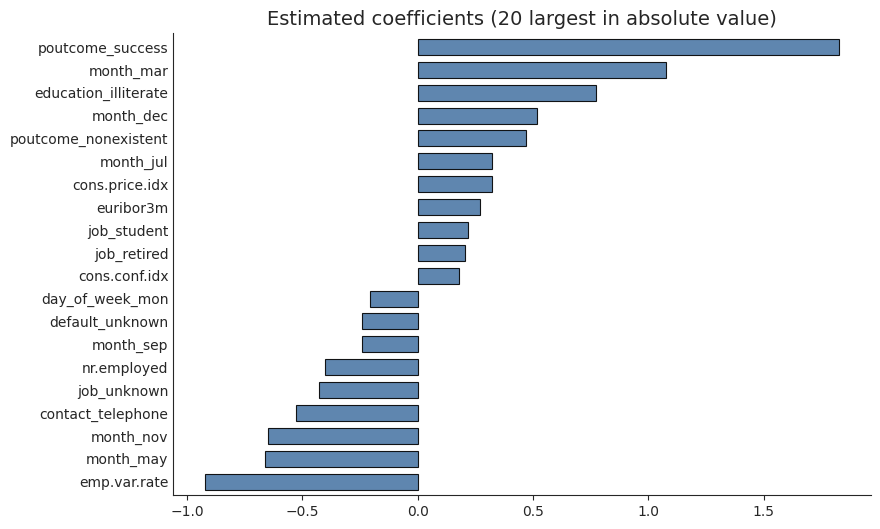

In [89]:
from tutorial4 import coefplot
coefplot(logit, predictors)
plt.show()

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

qda = QuadraticDiscriminantAnalysis(reg_param = 0.5)
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(reg_param=0.5)

In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

##Logistic Regression With Regularization


*   l1
*   l2



In [92]:
from sklearn.linear_model import LogisticRegressionCV
logit_l1= LogisticRegressionCV(penalty='l1', solver='liblinear', scoring='neg_log_loss', random_state = 10)
logit_l1.fit(X_train, y_train)

LogisticRegressionCV(penalty='l1', random_state=10, scoring='neg_log_loss',
                     solver='liblinear')

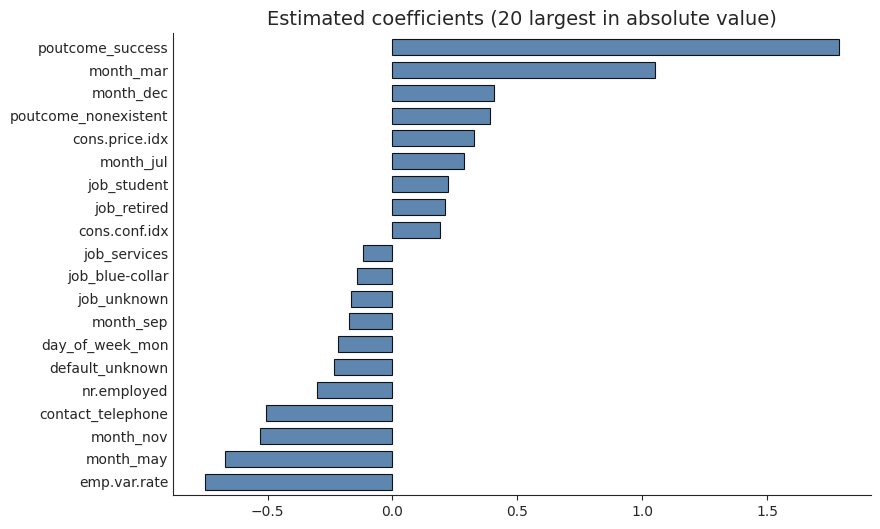

In [93]:
coefplot(logit_l1, predictors)
plt.show()

In [94]:
logit_l2= LogisticRegressionCV(Cs = 50, penalty='l2', solver='lbfgs', scoring='neg_log_loss', random_state = 10)
logit_l2.fit(X_train, y_train)

LogisticRegressionCV(Cs=50, random_state=10, scoring='neg_log_loss')

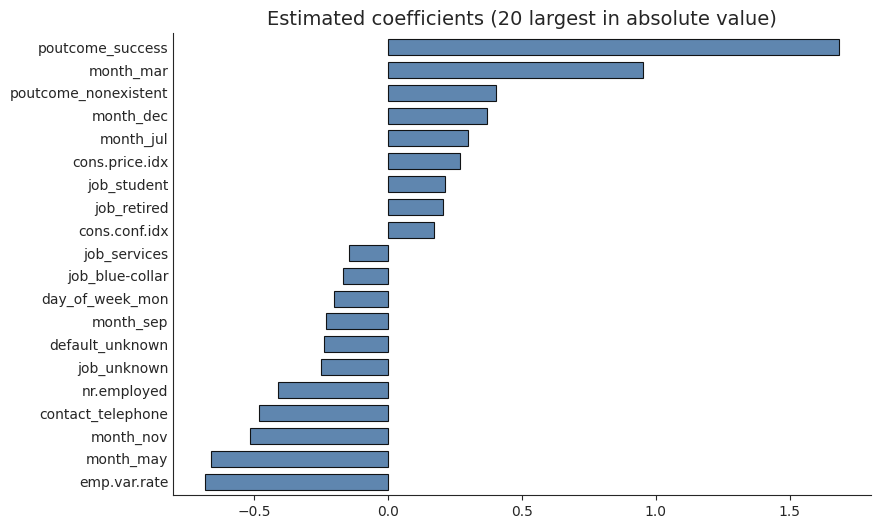

In [95]:
coefplot(logit_l2, predictors)
plt.show()

#Tree-based Model




#Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=8)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=8)

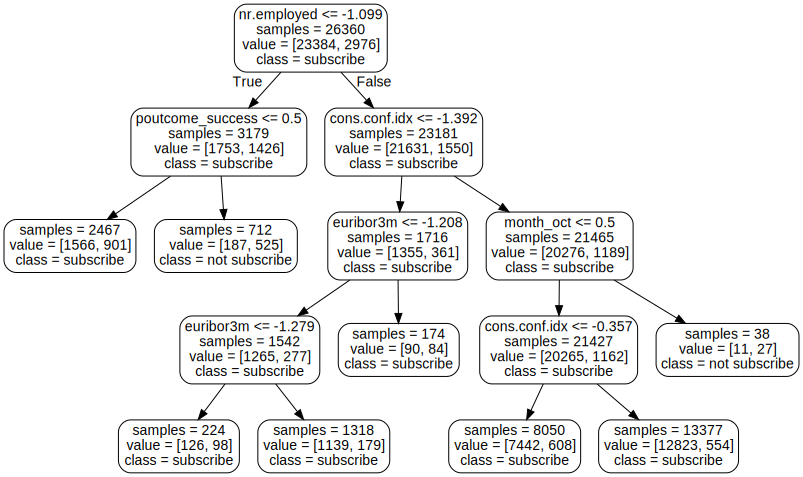

In [97]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None , impurity=False, feature_names = predictors,
                           class_names=['subscribe','not subscribe'], rounded=True)
graph = graphviz.Source(dot_data)
graph

In [98]:
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)
path = model.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas

search_space = {
    'ccp_alpha': alphas,
}

tree_search = RandomizedSearchCV(model, search_space, cv = 5 , scoring='neg_log_loss', random_state=10)
tree_search.fit(X_train, y_train)
tree = tree_search.best_estimator_

print('Best parameters found by random search:', tree_search.best_params_, '\n')

Best parameters found by random search: {'ccp_alpha': 0.0003231807998753536} 



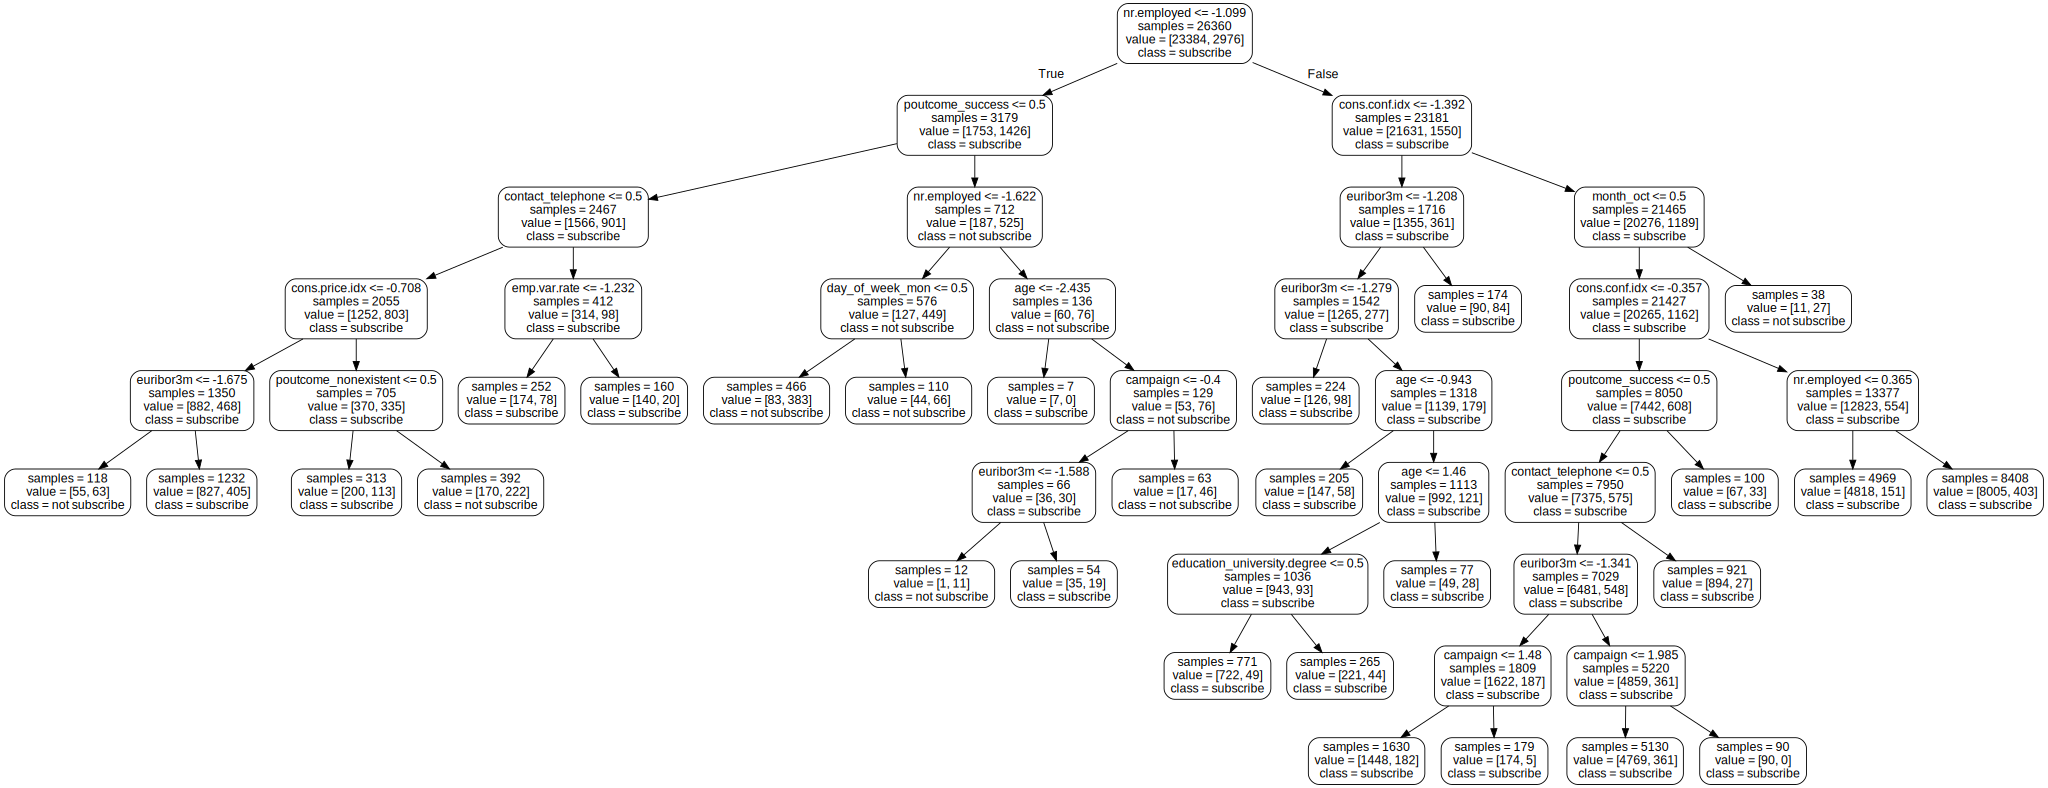

In [99]:
dot_data = export_graphviz(tree, out_file=None , impurity=False, feature_names = predictors,
                           class_names=['subscribe','not subscribe'], rounded=True)
graph = graphviz.Source(dot_data)
graph.render('tree02')
graph

#Bagging

In [100]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'), n_estimators=1000, random_state=10)
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                  n_estimators=1000, random_state=10)

#Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(n_estimators=1000,  criterion='entropy',
                max_features = 8, min_samples_leaf = 5, random_state=10)

In [102]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=8, min_samples_leaf=5,
                       n_estimators=1000, random_state=10)

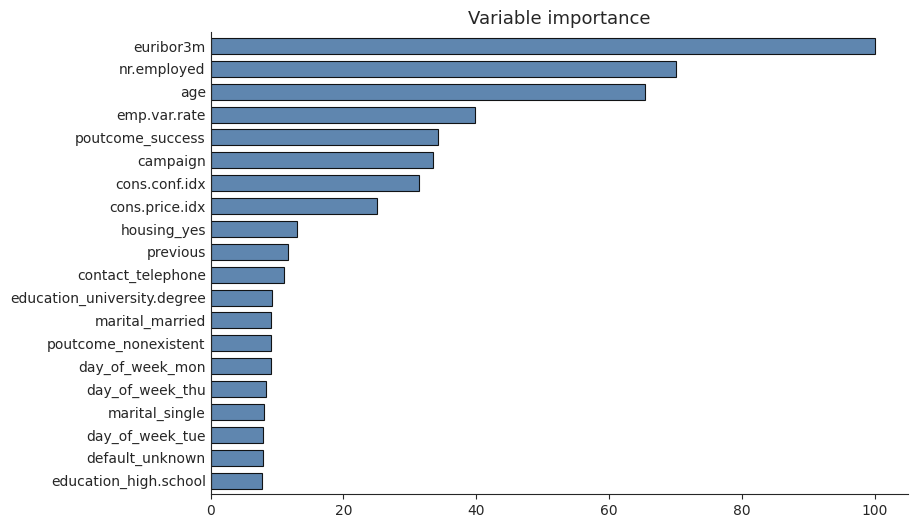

In [103]:
from tutorial9 import plot_feature_importance

plot_feature_importance(rf, predictors)
plt.show()
#higher = more important

In [104]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

def objective(trial):

    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_int('max_features', 1, 20)


    model = RandomForestClassifier(n_estimators = 1000,
                                  criterion = criterion,
                                  max_features = max_features,
                                  min_samples_leaf= min_samples_leaf,
                                  random_state = 10)

    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')
    loss = 1 - np.mean(scores)

    return loss

sampler = TPESampler(seed=42)
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials = 100, timeout = 60)

[I 2024-05-08 10:25:47,450] A new study created in memory with name: no-name-745b2cae-5069-4692-93da-0b1797d758be
[I 2024-05-08 10:28:26,082] Trial 0 finished with value: 0.09939301972685877 and parameters: {'criterion': 'gini', 'min_samples_leaf': 15, 'max_features': 12}. Best is trial 0 with value: 0.09939301972685877.


In [105]:
paras = study.best_params
paras

{'criterion': 'gini', 'min_samples_leaf': 15, 'max_features': 12}

In [106]:
rf = RandomForestClassifier(n_estimators=1000, **paras, random_state = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=12, min_samples_leaf=15, n_estimators=1000,
                       random_state=10)

#Boosting




#Gradient Boosting

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 8, n_estimators= 1901, subsample = 0.596, random_state = 10)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, n_estimators=1901,
                           random_state=10, subsample=0.596)

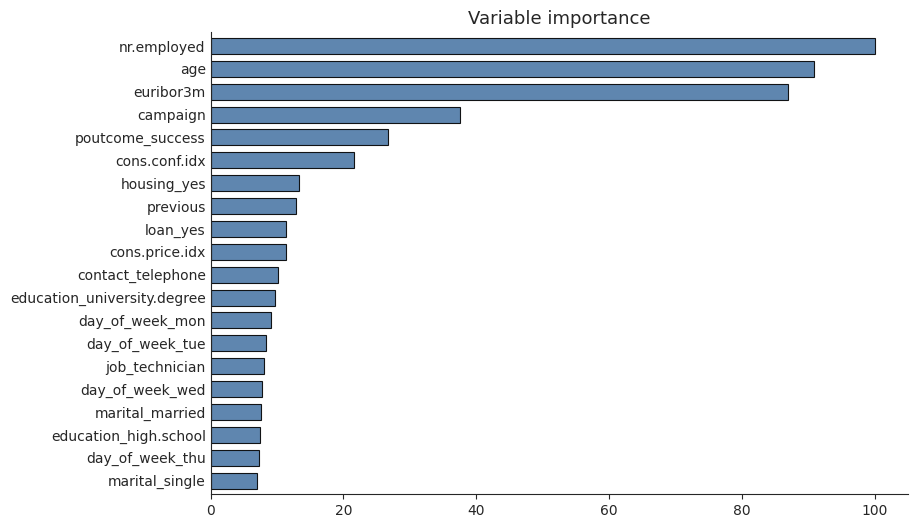

In [108]:
plot_feature_importance(gb, predictors)
plt.show()

#XGBoost

In [109]:
import xgboost as xgb

xgbst = xgb.XGBClassifier(booster = 'gbtree', learning_rate = 0.02,
              max_depth = 6, n_estimators = 2000, subsample = 0.60,  reg_lambda=0.0,
              reg_alpha = 0.0, colsample_bytree = 1.0, min_child_weight = 1.0)

xgbst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

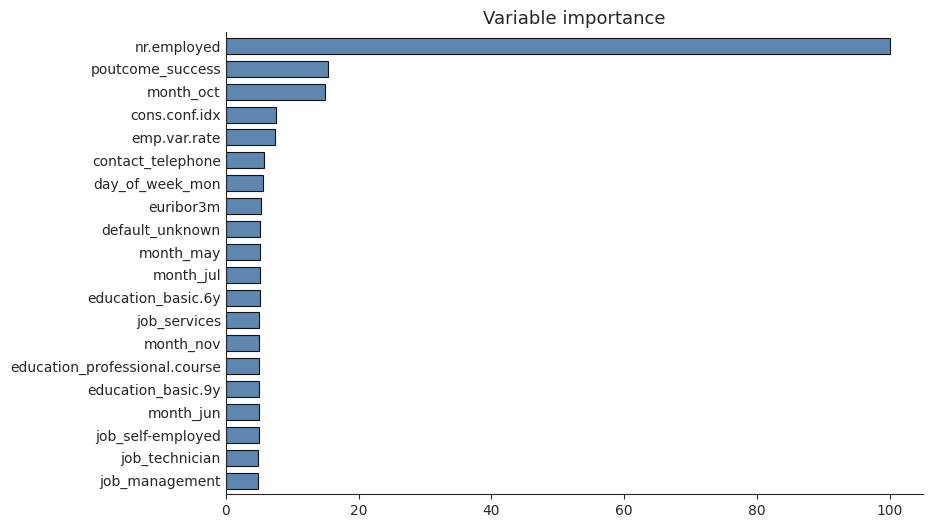

In [110]:
plot_feature_importance(xgbst, labels=predictors)
plt.show()

#LightGBM

In [111]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(boosting_type = 'gbdt',
              n_estimators = 2000, learning_rate = 0.01,
              num_leaves = 24,
              lambda_l1 = 0.0, lambda_l2 = 0.0,
              bagging_fraction = 0.74, bagging_freq = 1,
              feature_fraction = 1.0, min_data_in_leaf = 1)

lgbm = lgbm.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=0.74, subsample=1.0 will be ignored. Current value: bagging_fraction=0.74
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Cur

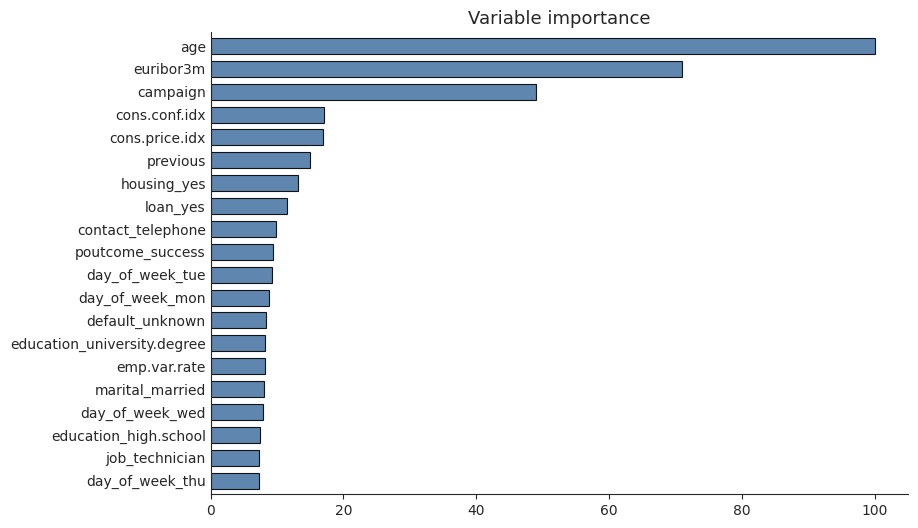

In [112]:
plot_feature_importance(lgbm, labels=predictors)
plt.show()

In [113]:
dtrain = lgb.Dataset(X_train, y_train)

In [114]:
import optuna.integration.lightgbm as lgb
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'learning_rate': 0.05,
    'feature_pre_filter': False,
    'verbosity': -1,
    'random state': 10
}
tuner = lgb.LightGBMTunerCV(params, dtrain, num_boost_round = 5000, callbacks = [lgb.early_stopping(stopping_rounds = 50)],
                            time_budget = 120, nfold=5, stratified = False, seed = 10)
tuner.run()

[I 2024-05-08 10:31:55,194] A new study created in memory with name: no-name-87f1f530-b06c-4e74-b57a-2b823ce1bf16
feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.800198:  14%|#4        | 1/7 [00:03<00:21,  3.60s/it]

Early stopping, best iteration is:
[72]	cv_agg's valid auc: 0.800198 + 0.00941774
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.800619:  29%|##8       | 2/7 [00:05<00:11,  2.38s/it]

Early stopping, best iteration is:
[32]	cv_agg's valid auc: 0.800619 + 0.00995564
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.802220:  43%|####2     | 3/7 [00:06<00:08,  2.10s/it]

Early stopping, best iteration is:
[47]	cv_agg's valid auc: 0.80222 + 0.00995215
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.802220:  57%|#####7    | 4/7 [00:08<00:05,  1.87s/it]

Early stopping, best iteration is:
[32]	cv_agg's valid auc: 0.801845 + 0.010086
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.802220:  71%|#######1  | 5/7 [00:10<00:03,  1.98s/it]

Early stopping, best iteration is:
[72]	cv_agg's valid auc: 0.800807 + 0.00952592
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.802220:  86%|########5 | 6/7 [00:14<00:02,  2.80s/it]

Early stopping, best iteration is:
[62]	cv_agg's valid auc: 0.801682 + 0.00907029
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.803085: 100%|##########| 7/7 [00:17<00:00,  2.43s/it]


Early stopping, best iteration is:
[11]	cv_agg's valid auc: 0.803085 + 0.0111134


num_leaves, val_score: 0.803085:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:   5%|5         | 1/20 [00:02<00:40,  2.15s/it]

Early stopping, best iteration is:
[10]	cv_agg's valid auc: 0.796072 + 0.00792964
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  10%|#         | 2/20 [00:03<00:35,  1.94s/it]

Early stopping, best iteration is:
[74]	cv_agg's valid auc: 0.802329 + 0.00921907
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  15%|#5        | 3/20 [00:06<00:35,  2.07s/it]

Early stopping, best iteration is:
[10]	cv_agg's valid auc: 0.795458 + 0.00864741
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  20%|##        | 4/20 [00:07<00:28,  1.76s/it]

Early stopping, best iteration is:
[11]	cv_agg's valid auc: 0.802839 + 0.0112241
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  25%|##5       | 5/20 [00:08<00:23,  1.57s/it]

Early stopping, best iteration is:
[11]	cv_agg's valid auc: 0.802138 + 0.0114585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  30%|###       | 6/20 [00:13<00:38,  2.73s/it]

Early stopping, best iteration is:
[10]	cv_agg's valid auc: 0.799652 + 0.0109398
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  35%|###5      | 7/20 [00:16<00:35,  2.70s/it]

Early stopping, best iteration is:
[10]	cv_agg's valid auc: 0.792032 + 0.00747189
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  40%|####      | 8/20 [00:17<00:28,  2.34s/it]

Early stopping, best iteration is:
[6]	cv_agg's valid auc: 0.799574 + 0.0114603
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  45%|####5     | 9/20 [00:19<00:23,  2.12s/it]

Early stopping, best iteration is:
[9]	cv_agg's valid auc: 0.799911 + 0.0100655
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  50%|#####     | 10/20 [00:23<00:25,  2.54s/it]

Early stopping, best iteration is:
[316]	cv_agg's valid auc: 0.797344 + 0.010642
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  55%|#####5    | 11/20 [00:28<00:30,  3.41s/it]

Early stopping, best iteration is:
[8]	cv_agg's valid auc: 0.79718 + 0.00957625
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  60%|######    | 12/20 [00:29<00:22,  2.81s/it]

Early stopping, best iteration is:
[8]	cv_agg's valid auc: 0.800824 + 0.0118052
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  65%|######5   | 13/20 [00:32<00:18,  2.67s/it]

Early stopping, best iteration is:
[11]	cv_agg's valid auc: 0.7955 + 0.00790846
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  70%|#######   | 14/20 [00:33<00:14,  2.41s/it]

Early stopping, best iteration is:
[4]	cv_agg's valid auc: 0.797088 + 0.0111548
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  75%|#######5  | 15/20 [01:14<01:08, 13.76s/it]

Early stopping, best iteration is:
[3979]	cv_agg's valid auc: 0.796317 + 0.0100357
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  80%|########  | 16/20 [01:15<00:40, 10.06s/it]

Early stopping, best iteration is:
[9]	cv_agg's valid auc: 0.800629 + 0.0109874
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  85%|########5 | 17/20 [01:16<00:22,  7.40s/it]

Early stopping, best iteration is:
[8]	cv_agg's valid auc: 0.802776 + 0.0111278
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  90%|######### | 18/20 [01:18<00:11,  5.57s/it]

Early stopping, best iteration is:
[8]	cv_agg's valid auc: 0.801299 + 0.0123469
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085:  95%|#########5| 19/20 [01:19<00:04,  4.40s/it]

Early stopping, best iteration is:
[4]	cv_agg's valid auc: 0.799859 + 0.0122799
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.803085: 100%|##########| 20/20 [01:24<00:00,  4.21s/it]


Early stopping, best iteration is:
[10]	cv_agg's valid auc: 0.800288 + 0.0106659


bagging, val_score: 0.803085:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.803085:  10%|#         | 1/10 [00:01<00:14,  1.65s/it]

Early stopping, best iteration is:
[11]	cv_agg's valid auc: 0.802788 + 0.0106583
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.803085:  20%|##        | 2/10 [00:03<00:13,  1.66s/it]

Early stopping, best iteration is:
[11]	cv_agg's valid auc: 0.802147 + 0.0102592
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.803085:  30%|###       | 3/10 [00:04<00:11,  1.61s/it]

Early stopping, best iteration is:
[17]	cv_agg's valid auc: 0.798959 + 0.00948345
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.803085:  40%|####      | 4/10 [00:06<00:08,  1.49s/it]

Early stopping, best iteration is:
[11]	cv_agg's valid auc: 0.80241 + 0.0109079
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.803085:  50%|#####     | 5/10 [00:08<00:08,  1.72s/it]

Early stopping, best iteration is:
[51]	cv_agg's valid auc: 0.800573 + 0.0091902
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.803085:  60%|######    | 6/10 [00:13<00:11,  2.91s/it]

Early stopping, best iteration is:
[48]	cv_agg's valid auc: 0.802111 + 0.0104305
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.803085:  70%|#######   | 7/10 [00:15<00:07,  2.65s/it]

Early stopping, best iteration is:
[54]	cv_agg's valid auc: 0.79785 + 0.0101
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.803085:  80%|########  | 8/10 [00:17<00:04,  2.27s/it]

Early stopping, best iteration is:
[12]	cv_agg's valid auc: 0.803063 + 0.0111781
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.803085:  90%|######### | 9/10 [00:18<00:01,  1.97s/it]

Early stopping, best iteration is:
[12]	cv_agg's valid auc: 0.803058 + 0.0111131
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.803247: 100%|##########| 10/10 [00:19<00:00,  1.98s/it]


Early stopping, best iteration is:
[12]	cv_agg's valid auc: 0.803247 + 0.0114161


  0%|          | 0/5 [00:00<?, ?it/s]


In [115]:
print('Best params:')

tuner.best_params

Best params:


{'objective': 'binary',
 'boosting_type': 'gbdt',
 'metric': 'auc',
 'learning_rate': 0.05,
 'feature_pre_filter': False,
 'verbosity': -1,
 'random state': 10,
 'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'num_leaves': 31,
 'feature_fraction': 0.8,
 'bagging_fraction': 0.9770288882939473,
 'bagging_freq': 1,
 'min_child_samples': 20}

In [128]:
import lightgbm as lgb
params = {'objective': 'binary',
      'boosting_type': 'gbdt',
      'metric': 'auc',
      'learning_rate': 0.05,
      'feature_pre_filter': False,
      'verbosity': -1,
      'random state': 10,
      'lambda_l1': 0.0,
      'lambda_l2': 0.0,
      'num_leaves': 31,
      'feature_fraction': 0.8,
      'bagging_fraction': 0.9770288882939473,
      'bagging_freq': 1,
      'min_child_samples': 20}

lgbm = lgb.LGBMClassifier(**params)
lgbm.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.9770288882939473, bagging_freq=1,
               feature_fraction=0.8, feature_pre_filter=False, lambda_l1=0.0,
               lambda_l2=0.0, learning_rate=0.05, metric='auc',
               objective='binary', random state=10, verbosity=-1)

#CatBoost

In [117]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(loss_function='Logloss',
                       iterations = 2000, learning_rate = 0.01,
                       l2_leaf_reg = 0.0,
                       max_depth = 6,
                       subsample = 0.8,
                       verbose=0)

cb.fit(X_train, y_train)

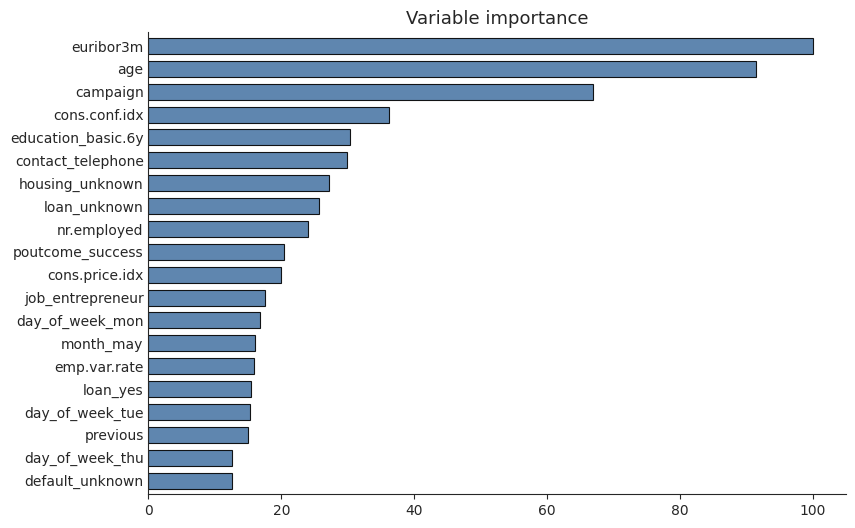

In [118]:
plot_feature_importance(cb, labels=predictors)
plt.show()

#Model Stacking

In [119]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('logit_l2', LogisticRegressionCV(Cs = 50, penalty='l2', solver='lbfgs', scoring='neg_log_loss', random_state = 10)),
    ('xgbst', xgb.XGBClassifier(booster = 'gbtree', learning_rate = 0.02,
              max_depth = 6, n_estimators = 2000, subsample = 0.60,  reg_lambda=0.0,
              reg_alpha = 0.0, colsample_bytree = 1.0, min_child_weight = 1.0)),
    ('cb', CatBoostClassifier(loss_function='Logloss',
                       iterations = 2000, learning_rate = 0.01,
                       l2_leaf_reg = 0.0,
                       max_depth = 6,
                       subsample = 0.8,
                       verbose=0))]


stack = StackingClassifier(estimators=estimators, cv = 5, final_estimator=LogisticRegression(penalty= None))
stack.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('logit_l2',
                                LogisticRegressionCV(Cs=50, random_state=10,
                                                     scoring='neg_log_loss')),
                               ('xgbst',
                                XGBClassifier(base_score=None, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=1.0, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=No...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=1.0, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=2000, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x7eaa3d988e20>)],
                   final_estimator=LogisticRegression(penalty=None))

#Validatioin Results

In [129]:
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, confusion_matrix, log_loss


columns=['Loss', 'Error Rate', 'Sensitivity', 'Specificity', 'Recall', 'Precision', 'F1-score', 'AUC', 'Cross-entropy']
rows=['Logistic', 'LDA', 'QDA', 'KNN', 'Logistic l1', 'Logistic l2', 'Classification Tree', 'Bagged trees', 'Random Forest','GBM',
   'XGBoost','LightGBM','CatBoost','Stack']
results=pd.DataFrame(0.0, columns=columns, index=rows)

methods=[logit, lda, qda, knn, logit_l1, logit_l2, clf, bag, rf, gb, xgbst, lgbm, cb, stack]

y_valid = np.ravel(y_valid)
y_prob = np.zeros((len(y_valid), len(rows)))

for i, method in enumerate(methods):

    y_prob[:,i] = method.predict_proba(X_valid)[:,1]
    y_pred = (y_prob[:,i] > tau).astype(int)

    loss =  2*((y_pred!=y_valid) & (y_pred==0)) + 1*((y_pred!=y_valid) & (y_pred==1))

    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()

    results.iloc[i,0] =  np.mean(loss) # or (fp*1+fn*2)/len(y_test)
    results.iloc[i,1] =  1 - accuracy_score(y_valid, y_pred)
    results.iloc[i,2] =  tp/(tp+fn)
    results.iloc[i,3] =  tn/(tn+fp)
    results.iloc[i,4] =  tp/(tp+fn)
    results.iloc[i,5] =  precision_score(y_valid, y_pred)
    results.iloc[i,6] =  2*(precision_score(y_valid, y_pred))*(tp/(tp+fn))/((precision_score(y_valid, y_pred))+(tp/(tp+fn)))
    results.iloc[i,7] =  roc_auc_score(y_valid, y_prob[:,i])
    results.iloc[i,8] =  log_loss(y_valid, y_prob[:,i])

results.round(4)

,Loss,Error Rate,Sensitivity,Specificity,Recall,Precision,F1-score,AUC,Cross-entropy
Logistic,0.1760,0.1093,0.4022,0.9522,0.4022,0.5139,0.4512,0.7884,0.2762
LDA,0.1783,0.1190,0.4688,0.9329,0.4688,0.4675,0.4681,0.7860,0.3244
QDA,0.1792,0.1208,0.4769,0.9298,0.4769,0.4606,0.4686,0.7822,0.4014
KNN,0.1722,0.1085,0.4293,0.9496,0.4293,0.5172,0.4692,0.7774,0.5168
Logistic l1,0.1778,0.1097,0.3899,0.9532,0.3899,0.5116,0.4426,0.7895,0.2759
Logistic l2,0.1780,0.1100,0.3913,0.9527,0.3913,0.5097,0.4427,0.7887,0.2760
Classification Tree,0.1765,0.1264,0.5516,0.9141,0.5516,0.4466,0.4936,0.7791,0.2768
Bagged trees,0.1791,0.1205,0.4755,0.9303,0.4755,0.4617,0.4685,0.7825,0.3210
Random Forest,0.1689,0.1105,0.4769,0.9414,0.4769,0.5058,0.4909,0.8077,0.2678
GBM,0.1707,0.1067,0.4266,0.9520,0.4266,0.5277,0.4718,0.7927,0.2849


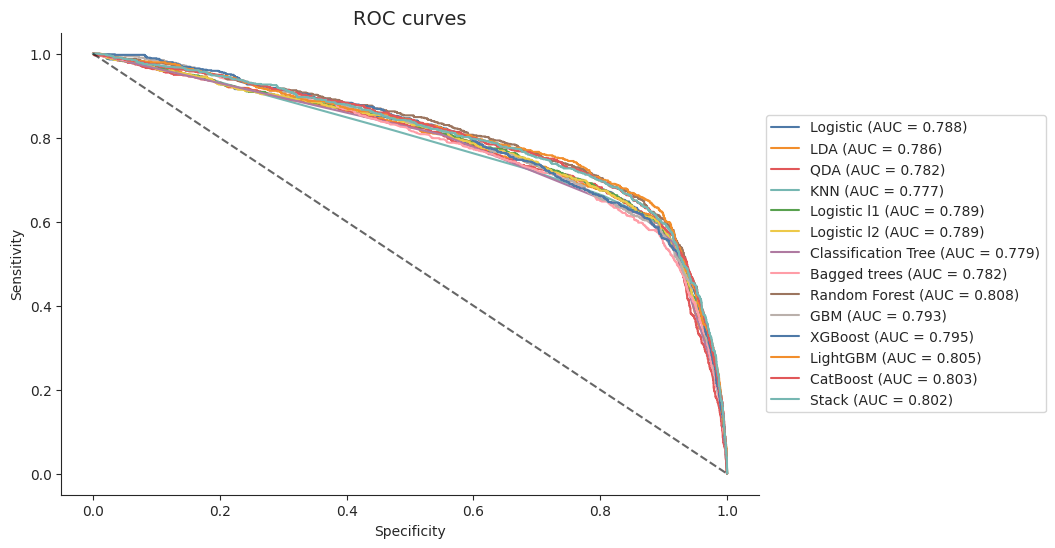

In [121]:
from tutorial9 import plot_roc_curves

fig, ax = plot_roc_curves(y_valid, y_prob, labels=pd.Series(rows))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


#Model Valuation

In [122]:
X_tv = tv.loc[:,predictors].to_numpy()
y_tv = tv.loc[:,'y'].to_numpy()

In [123]:
X_tv.shape, y_tv.shape

((32950, 51), (32950,))

In [124]:
best_model = RandomForestClassifier(n_estimators=1000, **paras, random_state = 10)
best_model.fit(X_tv, y_tv)

RandomForestClassifier(max_features=12, min_samples_leaf=15, n_estimators=1000,
                       random_state=10)

In [125]:
benchmark_model = LogisticRegressionCV(penalty='l1', solver='liblinear', scoring='neg_log_loss', random_state = 10)
benchmark_model.fit(X_tv, y_tv)

LogisticRegressionCV(penalty='l1', random_state=10, scoring='neg_log_loss',
                     solver='liblinear')

In [126]:
columns=['Loss', 'Error Rate', 'Sensitivity', 'Specificity', 'Recall', 'Precision', 'F1-score', 'AUC', 'Cross-entropy']
rows=['Logistic_l1','Random Forest']
results=pd.DataFrame(0.0, columns=columns, index=rows)

methods=[benchmark_model, best_model]

y_test = np.ravel(y_test)
y_prob = np.zeros((len(y_test), len(rows)))

for i, method in enumerate(methods):

    y_prob[:,i] = method.predict_proba(X_test)[:,1]
    y_pred = (y_prob[:,i] > tau).astype(int)

    loss =  2*((y_pred!=y_test) & (y_pred==0)) + 1*((y_pred!=y_test) & (y_pred==1))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    results.iloc[i,0] =  np.mean(loss) # or (fp*1+fn*2)/len(y_test)
    results.iloc[i,1] =  1 - accuracy_score(y_test, y_pred)
    results.iloc[i,2] =  tp/(tp+fn)
    results.iloc[i,3] =  tn/(tn+fp)
    results.iloc[i,4] =  tp/(tp+fn)
    results.iloc[i,5] =  precision_score(y_test, y_pred)
    results.iloc[i,6] =  2*(precision_score(y_test, y_pred))*(tp/(tp+fn))/((precision_score(y_test, y_pred))+(tp/(tp+fn)))
    results.iloc[i,7] =  roc_auc_score(y_test, y_prob[:,i])
    results.iloc[i,8] =  log_loss(y_test, y_prob[:,i])

results.round(4)

,Loss,Error Rate,Sensitivity,Specificity,Recall,Precision,F1-score,AUC,Cross-entropy
Logistic_l1,0.1844,0.1135,0.3707,0.9520,0.3707,0.4950,0.4239,0.7865,0.2836
Random Forest,0.1806,0.1173,0.4375,0.9393,0.4375,0.4776,0.4567,0.7965,0.2768


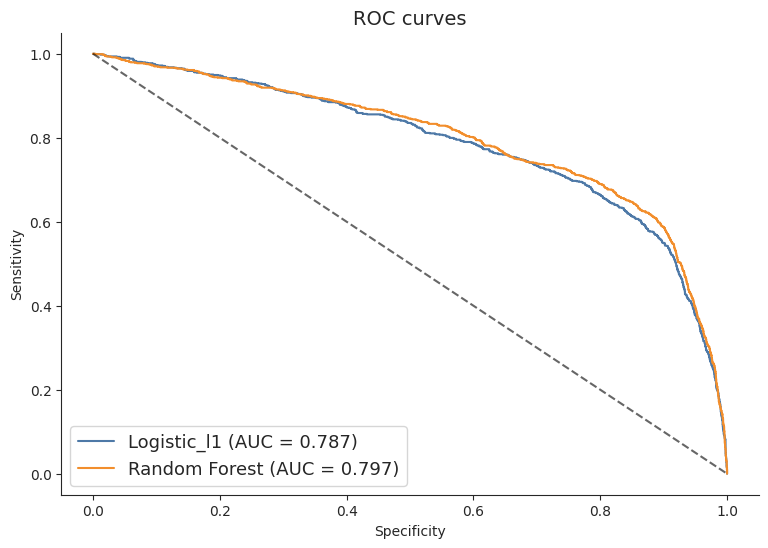

In [127]:
from tutorial9 import plot_roc_curves

fig, ax = plot_roc_curves(y_test, y_prob, labels=pd.Series(rows))
plt.show()